# Shifted sphere, dimension=500
**Using Pygmo SADE (Self-Adaptative Differential Evolution)**

In [1]:
import sys
sys.path.append("../")

In [2]:
import pygmo as pg
from functions_class import Shifted_sphere
from helpers import sade
from helpers import get_stats, plot_f_minus_fstar_10

In [3]:
dimension = 500

In [4]:
params = {
    "nb_generation": 5000,
    "variant": 18,
    "variant_adptv": 1,
    "ftol": 1e-04,
    "xtol": 1e-03
         }

In [5]:
population_size = 100

In [6]:
runs = []
for i in range(10):
    # re-initialise the problem
    # i.e. to get different (random)
    # initial solution
    sphere_pb = pg.problem(Shifted_sphere(dimension))
    logs, duration, champion_f, champion_x = sade(sphere_pb, population_size, params)
    fevals = [log[1] for log in logs]
    fitness_best = [log[2] for log in logs]
    runs.append([fevals, fitness_best, duration, champion_f, champion_x])

In [7]:
duration, best_champion_f, diff_optimum, norm2_to_optimum = get_stats(runs,
                                                     Shifted_sphere.BIAS,
                                                     Shifted_sphere.OPTIMUM)

if duration.seconds == 0:
    duration = "{0}ms".format(duration.microseconds//1000)
else:
    duration = "{0}mn:{1}s".format(duration.seconds//60,
                                   duration.seconds%60)
print("--- Statistics ---")
print("Population size of {0} and {1} generations".
      format(population_size, params["nb_generation"]))
print("-> Best run duration:                        | {0}".format(duration))
print("-> Best f value:                             | {0:12.7f}".format(best_champion_f))
print("-> Difference with function's optimum value: | {0:13.7f}".format(diff_optimum))
print("-> L2 norm to optimum solution:              | {0:13.7f}".format(norm2_to_optimum))
print("-> Number of function evaluations            | {0:,}".
      format(params["nb_generation"]*population_size))

--- Statistics ---
Population size of 100 and 5000 generations
-> Best run duration:                        | 0mn:13s
-> Best f value:                             | -449.9998474
-> Difference with function's optimum value: |     0.0001526
-> L2 norm to optimum solution:              |     0.0123532
-> Number of function evaluations            | 500,000


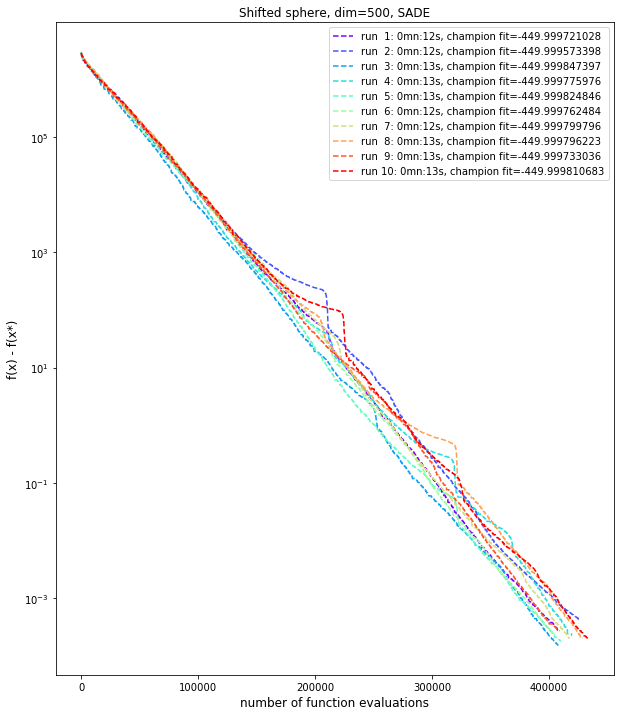

In [8]:
plot_f_minus_fstar_10(runs, Shifted_sphere.BIAS, title="Shifted sphere, dim=500, SADE")

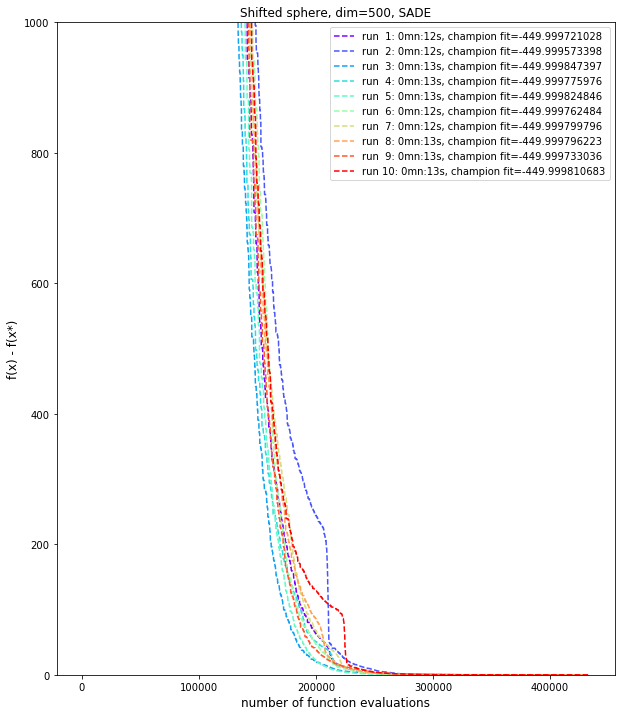

In [9]:
plot_f_minus_fstar_10(runs, Shifted_sphere.BIAS, title="Shifted sphere, dim=500, SADE",
                     ylog=False, ylim=[0, 1000])